# California House Price Prediction

##### Assignment Requirements

1. **Understanding the Data** : 
    - Provide a brief overview of the dataset. 
    - Discuss what the data represents and the meaning of each feature.
2. **Data Preprocessing**: 
    - Pre-process the data by handling missing values, outliers, and scaling.
    - Make sure the data is clean and ready for modeling.
3. **Feature Selection**: 
    - Determine if feature selection is necessary for this dataset. If yes, implement an appropriate feature selection method
    - Justify your choice.
4. **Model Selection and Hyperparameter Tuning** : 
    - Choose an appropriate regression model and perform hyperparameter tuning to optimize the model's performance. 
    - Explain the rationale behind your model selection and the tuning process.
5. **Model Testing and Output Metrics** : 
    - Test your model on a separate test set and evaluate its performance using appropriate metrics. 
    - Discuss the choice of metrics and their relevance to the problem.

#### 1. Understanding the data



- **Dataset Overview**

    **Size**: The dataset contains approximately 20,640 instances (rows) and 10 features (columns).

    **Purpose**: The primary goal is to predict the median house value for California districts based on various demographic and geographic features.

- **Detailed information about each feature**

    1. `longitude`:
        - Description: The longitude of the district's location.
        - Data Type: Continuous (float).
        
    2. `latitude`:
        - Description: The latitude of the district's location.
        - Data Type: Continuous (float).

    3. `housing_median_age`:
        - Description: The median age of the houses in the district.
        - Data Type: Continuous (float).

    4. `total_rooms`:
        - Description: The total number of rooms in all houses within a district.
        - Data Type: Continuous (float).

    5. `total_bedrooms`:
        - Description: The total number of bedrooms in all houses within a district.
        - Data Type: Continuous (float).
    
    6. `population`:
        - Description: The total population of the district.
        - Data Type: Continuous (float).

    7. `households`:
        - Description: The total number of households (a group of people living together) in the district.
        - Data Type: Continuous (float).

    8. `median_income`:
        - Description: The median income for households within the district.
        - Data Type: Continuous (float).

    9. `median_house_value`:
        - Description: The median house value for houses within the district (the target variable).
        - Data Type: Continuous (float).

    9. `ocean_proximity`:
        - Description: A categorical feature that represents the district's proximity to the ocean.
        - Data Type: Categorical (string).
        - Categories:
            - <1H OCEAN: Less than one hour from the ocean.
            - INLAND: Not near the coast.
            - ISLAND: An island.
            - NEAR OCEAN: Near the ocean, but not within one hour.
            - NEAR BAY: Near a bay, but not within one hour.

In [301]:
# importing libraries for data loading and pre-processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [302]:
#Loading the dataset
df = pd.read_csv('housing.csv')

In [303]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### 2. Data Preprocessing

In [304]:
# analyzing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [305]:
'''We can observe that the data is not scaled... Most of the features in the given dataset are having 20640 Non-Null 
values except one. So let us scale it to the least amongst all that is 20433'''

df.dropna(inplace=True)

In [306]:
'''All values are limited to 20433'''

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [307]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [308]:
''' We observe that all values of the all the columns in the dataset are float64 except for the 
values of ocean proximity. Let us now convert them into numericals for easy processing.'''

df = df.join(pd.get_dummies(df.ocean_proximity, dtype=int))

In [309]:
'''Since we got numerical values of the ocean_proximity, let us now drop the column ocean_proximity'''

df = df.drop(['ocean_proximity'], axis=1)

In [310]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


- Visualising the data 

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

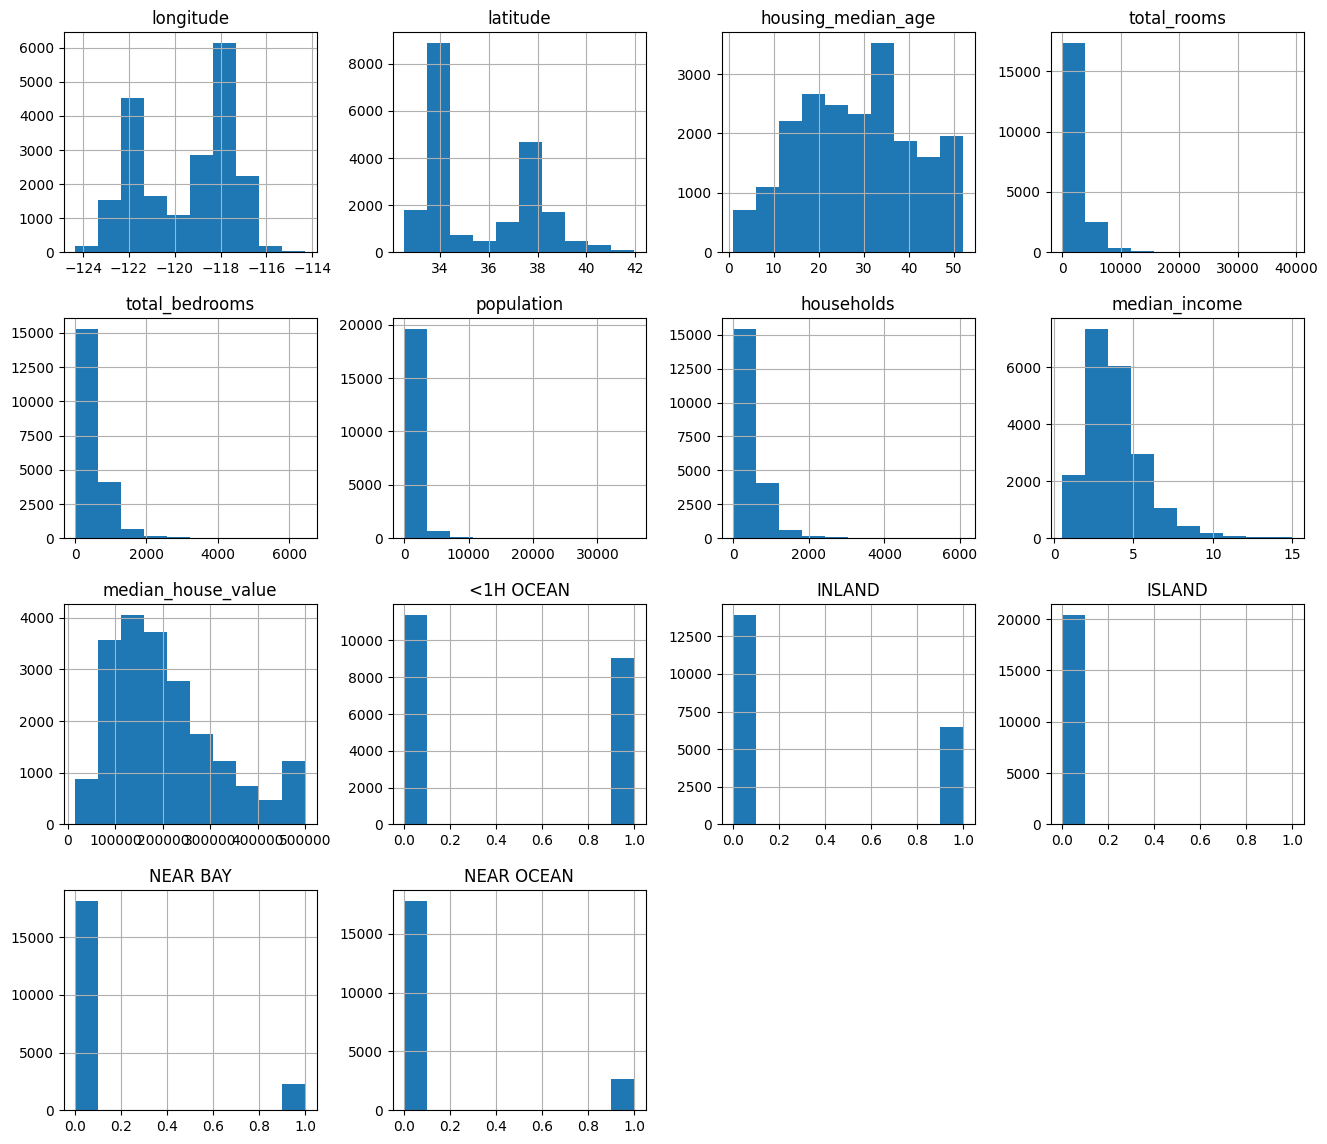

In [311]:
# visualizing the data using histogram

df.hist(figsize=(16,14))

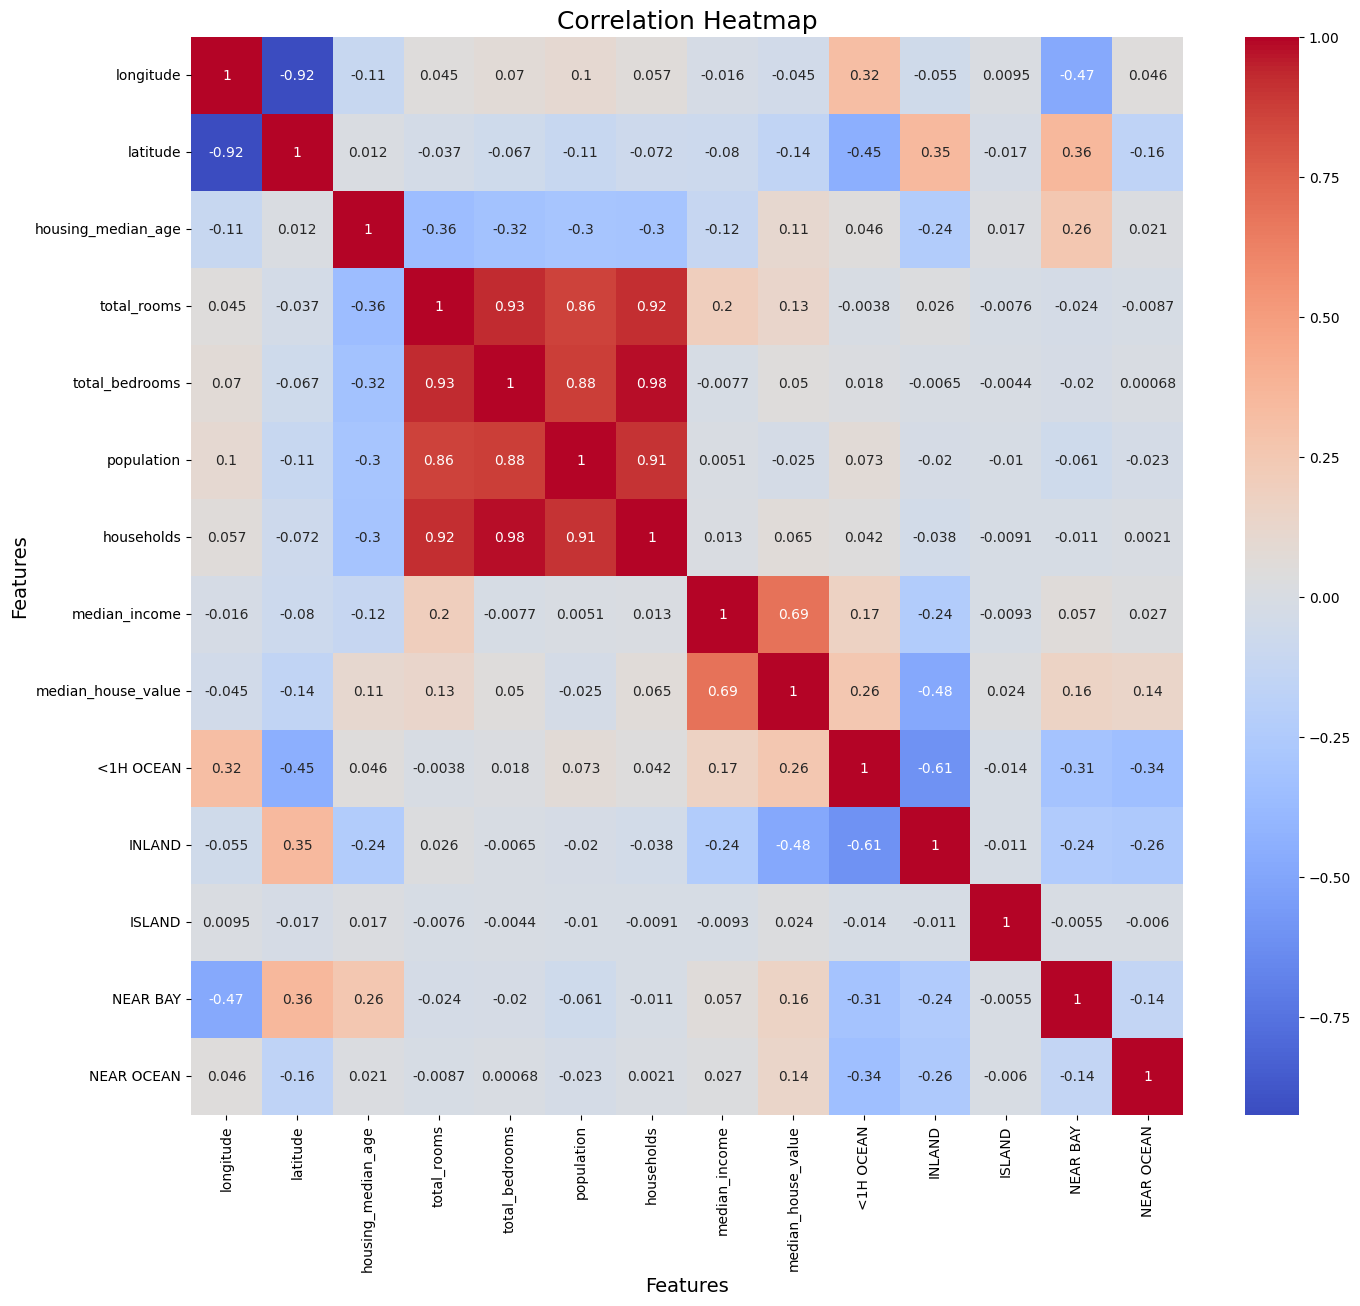

In [312]:
# #visualizing the correlation amongst the data using heatmap

plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", xticklabels=True, yticklabels=True)
plt.title('Correlation Heatmap', fontsize=18)  
plt.xlabel('Features', fontsize=14)  
plt.ylabel('Features', fontsize=14)
plt.show()

In [313]:
'''As we can observe that in the aforementioned histogram there are a few features whose graphs are odd ones, let us align them with the 
shape of other features. We cna achieve this by taking the logarithm of the feature and adding 1 to it.'''

df['total_rooms'] = np.log(df['total_rooms'] + 1)
df['total_bedrooms'] = np.log(df['total_bedrooms'] + 1)
df['population'] = np.log(df['population'] + 1)
df['households'] = np.log(df['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

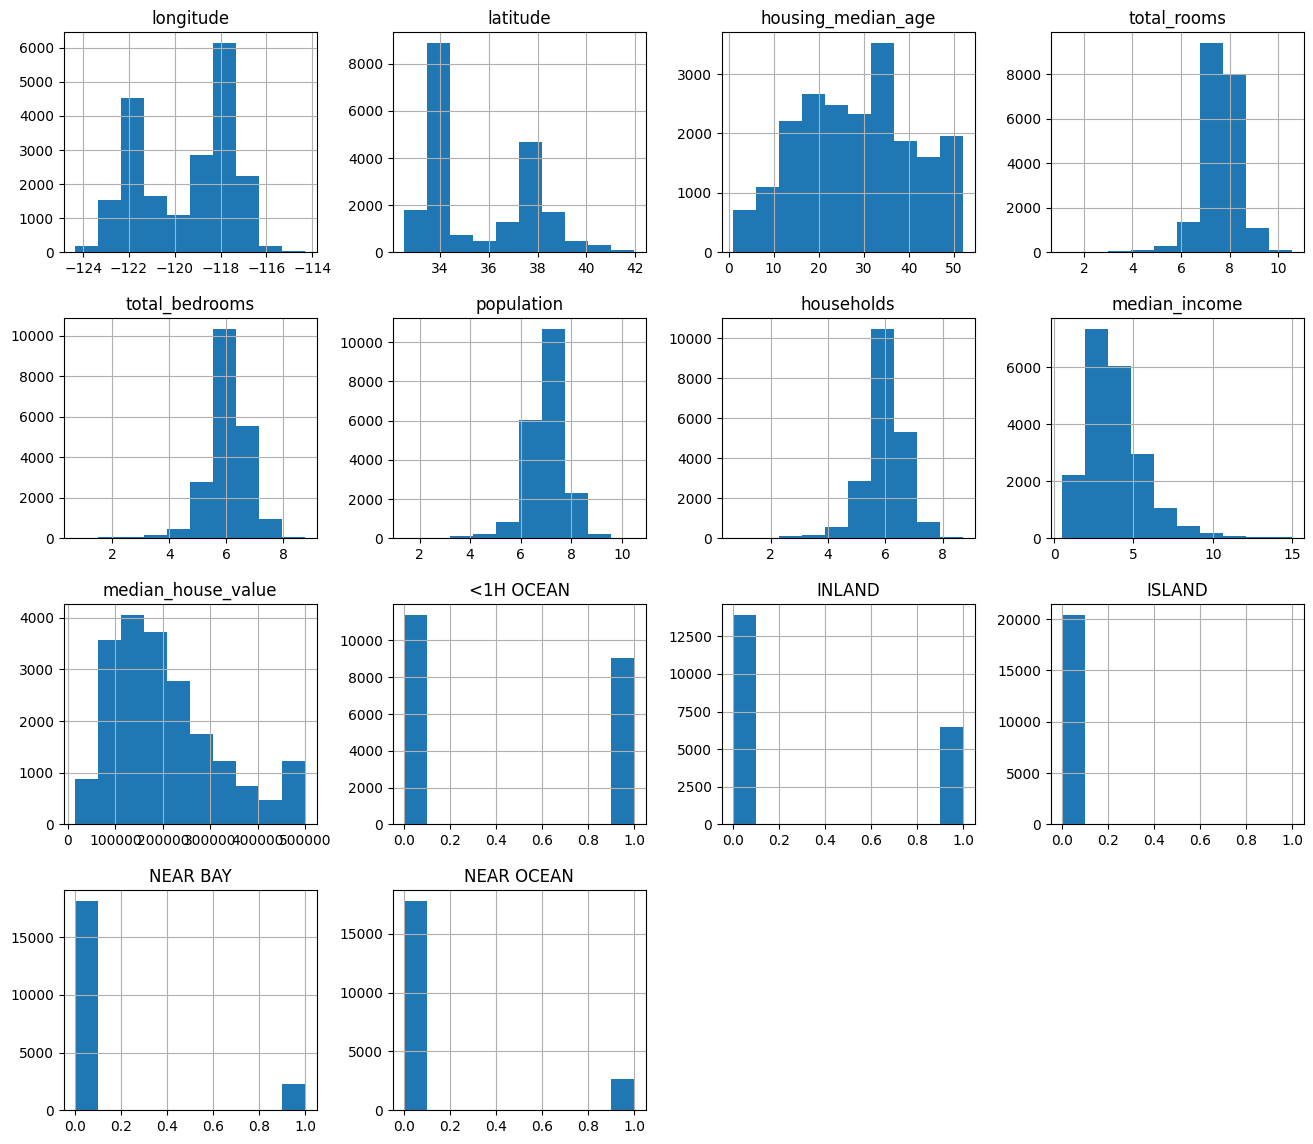

In [314]:
df.hist(figsize=(16,14))

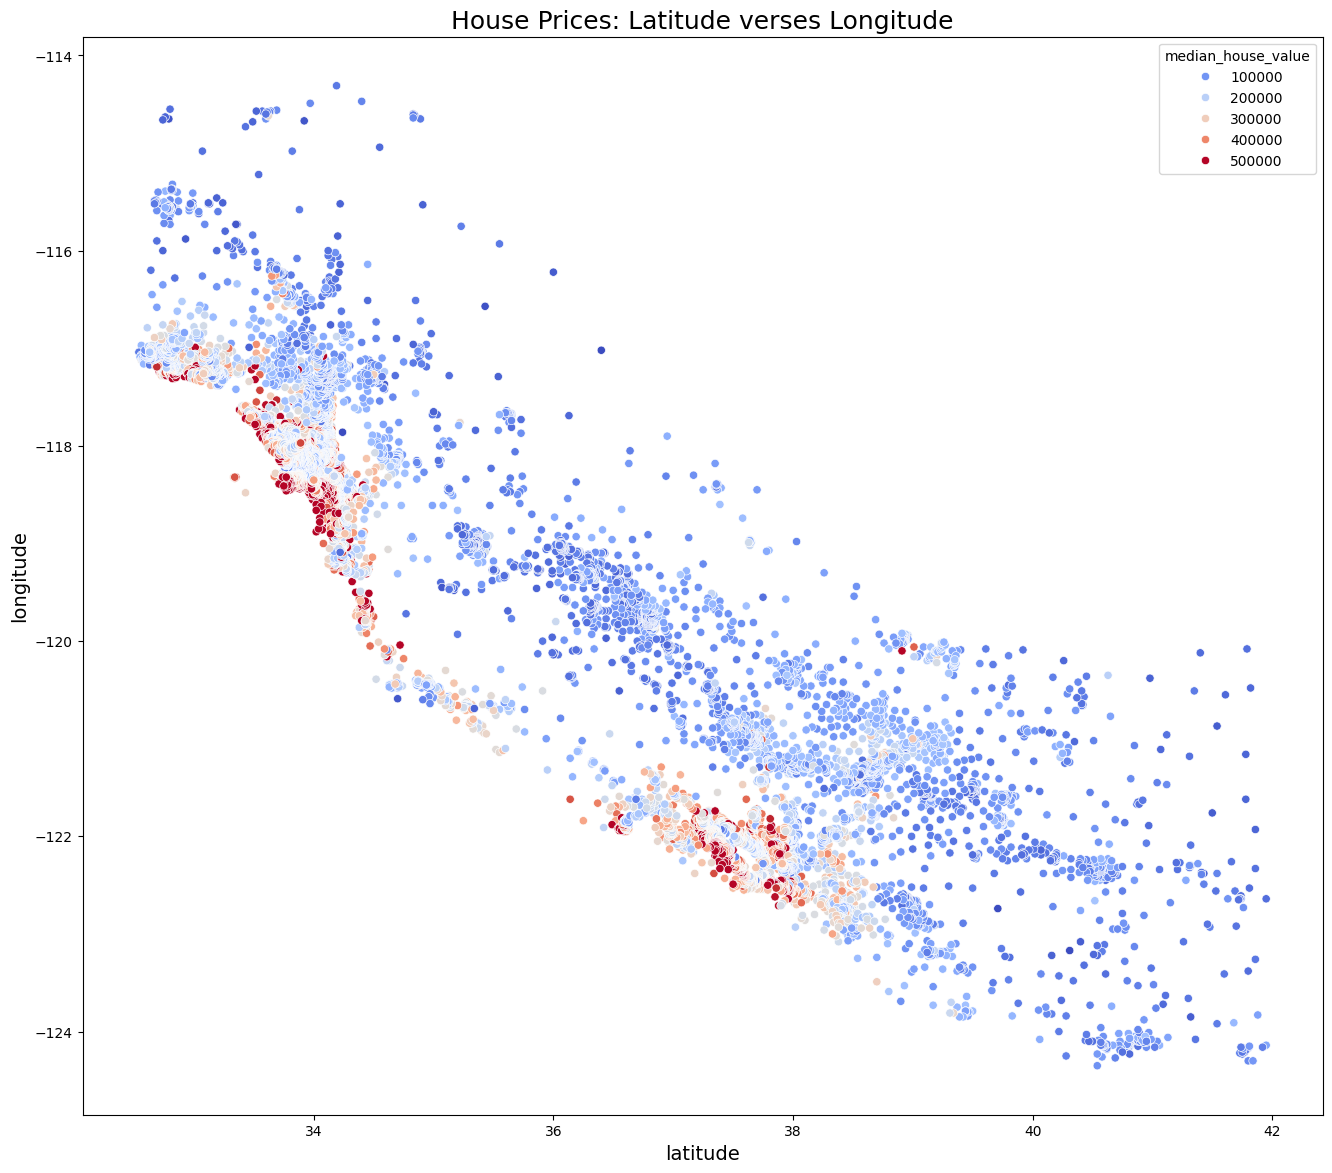

In [315]:
# Visualizing the data using plots. Let us compare the price of houses with respect to their longitude and latitude positions.

plt.figure(figsize=(16, 14))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='median_house_value', palette='coolwarm')
plt.title('House Prices: Latitude verses Longitude', fontsize=18)
plt.xlabel('latitude', fontsize=14)
plt.ylabel('longitude', fontsize=14)
plt.show()


#### 3. Feature Selection 

In [316]:
'''Performing feature engineering to get more valuable use cases and metrics to predict the price of the houses'''

df['rooms_per_household'] = df['total_rooms'] / df['households']
# Justification: Indicates the average number of rooms available per household, which helps assess living space per family.

df['income_per_household'] = (df['median_income']) / df['households']
# Justification: Estimates the average income per household, providing insight into economic status and affordability.

df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
# Justification: Reflects the proportion of rooms that are bedrooms, showing how room space is utilized.



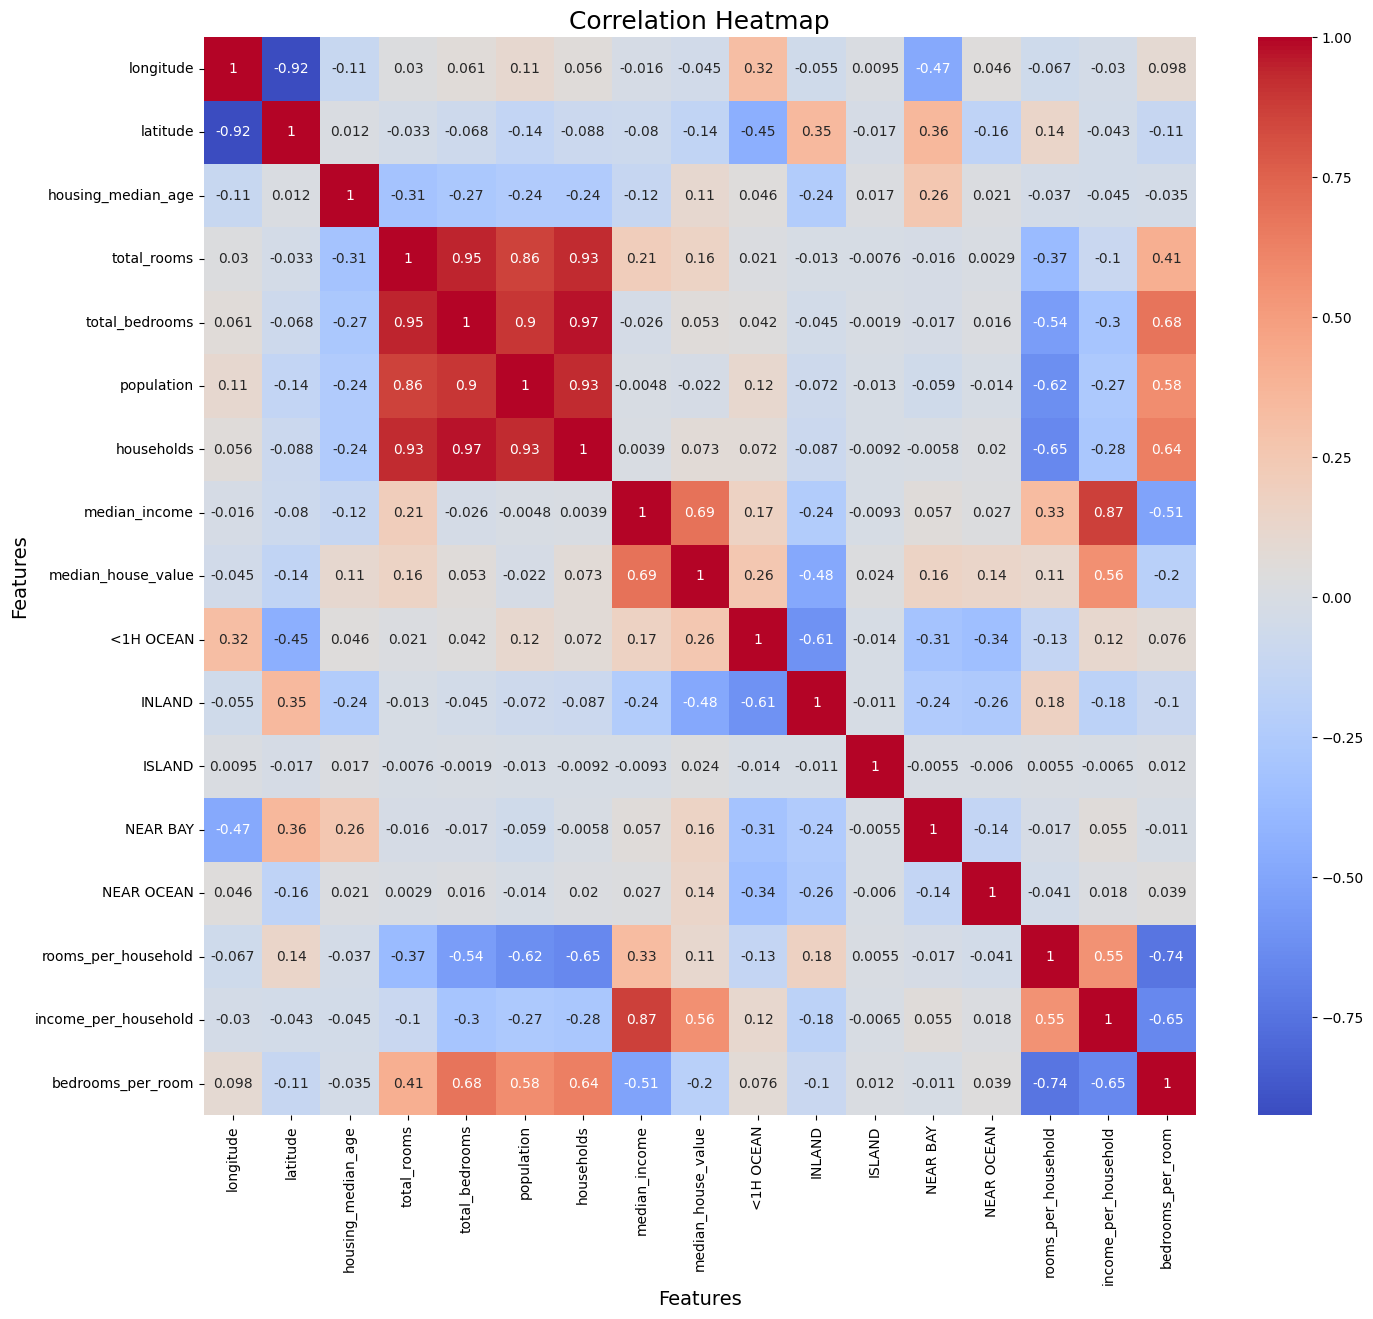

In [317]:
plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", xticklabels=True, yticklabels=True)
plt.title('Correlation Heatmap', fontsize=18)  
plt.xlabel('Features', fontsize=14)  
plt.ylabel('Features', fontsize=14)
plt.show()

#### 4. Model Selection, Model Hyperparameter tuning and Model Testing

In [318]:
# Splitting the training data to X and y for training and testing the model

'''Our target variable form the dataset is median_house_values so let us slit the data set into two different variables X and y'''

from sklearn.model_selection import train_test_split 

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    # 20% of the data remains unseen to the model and could be used later for testing

In [319]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,income_per_household,bedrooms_per_room
12394,-116.37,33.69,7.0,9.083302,7.341484,6.755769,6.107023,7.8005,0,1,0,0,0,1.487354,1.277300,0.808240
5677,-118.31,33.67,42.0,7.168580,5.509388,6.416732,5.493061,5.3074,0,0,0,0,1,1.305025,0.966201,0.768547
9098,-118.40,34.70,10.0,8.324336,6.703188,7.680176,6.566672,4.2941,0,1,0,0,0,1.267664,0.653923,0.805252
13065,-121.32,38.56,18.0,7.064759,5.231109,6.421622,5.262690,4.5766,0,1,0,0,0,1.342424,0.869631,0.740451
7931,-118.06,33.84,26.0,8.848078,7.282761,8.382061,7.271009,4.7953,1,0,0,0,0,1.216898,0.659510,0.823090


In [320]:
y_train.head()

12394    318100.0
5677     401900.0
9098     151600.0
13065    108700.0
7931     210900.0
Name: median_house_value, dtype: float64

In [321]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,income_per_household,bedrooms_per_room
2914,-119.08,35.36,12.0,8.770750,7.018402,7.995307,6.996681,4.5791,0,1,0,0,0,1.253558,0.654467,0.800205
2735,-115.56,32.79,20.0,7.771910,6.728629,7.733684,6.643790,1.1707,0,1,0,0,0,1.169801,0.176210,0.865763
10352,-117.68,33.63,13.0,8.670944,6.826545,7.971776,6.793466,6.2403,1,0,0,0,0,1.276365,0.918574,0.787290
17348,-120.42,34.91,4.0,8.851807,7.104965,7.938089,7.100852,3.2135,1,0,0,0,0,1.246584,0.452551,0.802657
18353,-122.12,37.37,37.0,7.277248,5.204007,6.309918,5.252273,10.7355,0,0,0,1,0,1.385542,2.043972,0.715106


In [322]:
y_test.head()

2914     123400.0
2735      62500.0
10352    257400.0
17348    212700.0
18353    500001.0
Name: median_house_value, dtype: float64

In [323]:
# Model Selected: Random Forest Regressor 

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()


In [324]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [325]:
accuracy_before_scaler = rf_reg.score(X_test, y_test)

In [326]:
#  scaling the data to improve the accuracy

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [327]:
#  Trying again with the scaler data

rf_reg.fit(X_train_scaler, y_train)

RandomForestRegressor()

In [328]:
# Model Evaluation
# Accuracy after scaler is applied to the training dataset

accuracy_after_scaler = rf_reg.score(X_test_scaler, y_test)

In [329]:
#  Calculating the difference before and after scaler

print(f"Accuracy before scaling the training dataset\t\t:\t{accuracy_before_scaler}")
print(f"Accuracy after scaling the training dataset\t\t:\t{accuracy_after_scaler}")
print(f"Accuracy Difference\t\t\t\t\t:\t{abs(accuracy_before_scaler - accuracy_after_scaler)}")

Accuracy before scaling the training dataset		:	0.805916695305944
Accuracy after scaling the training dataset		:	0.805646140128461
Accuracy Difference					:	0.0002705551774829784


- Hyperparameter Tuning

In [280]:
from sklearn.model_selection import GridSearchCV

grid = {
    "n_estimators" : [100, 200, 300],
    "min_samples_split" : [2, 4],
    "max_depth" : [None, 4, 8]
}

g_search = GridSearchCV(rf_reg, 
                        param_grid=grid, 
                        cv=5, 
                        scoring="neg_mean_squared_error", 
                        return_train_score=True)

In [281]:
g_search.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [282]:
# returns the best model found by GridSearchCV after hyperparameter tuning

g_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [330]:
# Model Evaluation 

g_search_accuracy = g_search.best_estimator_.score(X_test_scaler, y_test)

#### 5. Output Metrics

In [335]:
print(f"\n\n---------------------------------------------------- Accuracies ----------------------------------------------------\n\n")
print(f"Accuracy I (Before Scaler)\t\t\t\t:\t\t\t{accuracy_before_scaler:.5f}%")
print(f"Accuracy II (After Scaler)\t\t\t\t:\t\t\t{accuracy_after_scaler:.5f}%")
print(f"Accuracy III (Hyperparameter tuning)\t\t\t:\t\t\t{g_search_accuracy:.5f}%")





---------------------------------------------------- Accuracies ----------------------------------------------------


Accuracy I (Before Scaler)				:			0.80592%
Accuracy II (After Scaler)				:			0.80565%
Accuracy III (Hyperparameter tuning)			:			0.92475%


In [351]:
#  Making predictions from the best model

y_pred = g_search.best_estimator_.predict(X_test_scaler)

In [352]:
# Calculate metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [355]:
print(f"\n\n-------------------------------------- Model Evaluation Metrics --------------------------------------\n\n")
print(f"Mean Absolute Error (MAE)\t\t\t:\t\t\t{mae:.5f}")
print(f"Root Mean Squared Error (RMSE)\t\t\t:\t\t\t{rmse:.5f}")
print(f"R-squared (R²)\t\t\t\t\t:\t\t\t{r2:.5f}")



-------------------------------------- Model Evaluation Metrics --------------------------------------


Mean Absolute Error (MAE)			:			18808.76730
Root Mean Squared Error (RMSE)			:			31255.15129
R-squared (R²)					:			0.92475


#### Conclusion

**Justification** to use `RandomForestRegressor()` as regression model - It is a strong choice because it effectively captures complex patterns and interactions in the data without needing extensive adjustments.

**Justification** to use `GridSearchCV` as hyperparameter tuning - Grid Search CV thoroughly explores all possible hyperparameter combinations, ensuring you find the absolute best model configuration for your data.

**Relevance** of `GridSearchCV` with the problem - Using Grid Search CV for the California house price prediction is relevant because it ensures that your Random Forest model is optimally tuned, leading to more accurate predictions of housing prices based on the features in the dataset. This thorough search helps identify the best hyperparameters, which can significantly improve the model's ability to capture the complex relationships in the data.

<<< End of File >>>